## Dataset Fetching

In [9]:
! pip install kaggle

In [10]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
! cp kaggle.json ~/.kaggle/

In [12]:
! chmod 600 ~/.kaggle/kaggle.json

In [13]:
! kaggle datasets download "arkhoshghalb/twitter-sentiment-analysis-hatred-speech"

  0% 0.00/1.89M [00:00<?, ?B/s]
100% 1.89M/1.89M [00:00<00:00, 63.1MB/s]


In [14]:
! unzip 'twitter-sentiment-analysis-hatred-speech.zip'

Archive:  twitter-sentiment-analysis-hatred-speech.zip
  inflating: test.csv                
  inflating: train.csv               


## Data Preparation

In [15]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [16]:
#loading the data

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [17]:
train_df.head()

#1 represent tweet is racist/sexist and 0 represent tweet is not racist/sexist

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [18]:
#test dataset has no label column
test_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [19]:
print("Training Data Set Info - Total Rows | Total Columns | Total Null Values")
print(train_df.info())

Training Data Set Info - Total Rows | Total Columns | Total Null Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


In [20]:
print("Test Data Set Info - Total Rows | Total Columns | Total Null Values")
print(test_df.info())

Test Data Set Info - Total Rows | Total Columns | Total Null Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB
None


In [21]:
#combining the dataset to process the entire dataset at once
combine_df = train_df.append(test_df, ignore_index=True, sort=False)
combine_df.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [22]:
print(combine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49159 non-null  int64  
 1   label   31962 non-null  float64
 2   tweet   49159 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB
None


##  Data processing & cleaning

In [23]:
#converting html entities ( "&lt;" is converted to “<” and "&amp;" is converted to “&”)

from html.parser import HTMLParser
html_parser = HTMLParser()

In [24]:
combine_df['clean_tweet'] = combine_df['tweet'].apply(lambda x: html_parser.unescape(x))
combine_df.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,@user camping tomorrow @user @user @user @use...
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,@user @user welcome here ! i'm it's so #gr...


In [25]:
#removing  "@user" from all the tweets
def remove_pattern(input_text, pattern):
  r = re.findall(pattern, input_text)

  for i in r:
    input_text = re.sub(i, '', input_text)
  return input_text

In [26]:
combine_df['clean_tweet'] = np.vectorize(remove_pattern)(combine_df['clean_tweet'], "@[\w]*")
combine_df.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [27]:
#lowercase
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: x.lower())
combine_df.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [28]:
#creating an apostrophe dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"'cause": 'because',
 "ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [29]:
def lookup_dict(text, dictionary):
  for word in text.split():
    if word.lower() in dictionary:
      if word.lower() in text.split():
        text = text.replace(word, dictionary[word.lower()])
  return text

In [30]:
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: lookup_dict(x, apostrophe_dict))
combine_df.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [31]:
#short word lookup dictionary 
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [32]:
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: lookup_dict(x, short_word_dict))
combine_df.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [33]:
#emotions lookup
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [34]:
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
combine_df.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [35]:
#removing punctuations
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
combine_df.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation


In [36]:
#replacing speacial characters with space 
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', ' ', x))
combine_df.tail(10)

,id,label,tweet,clean_tweet
49149,49150,NaN,loving lifeðºð¸âï¸ð #createyourfutu...,loving life createyourfutu...
49150,49151,NaN,"black professor demonizes, proposes nazi style...",black professor demonizes proposes nazi style...
49151,49152,NaN,learn how to think positive. #positive #ins...,learn how to think positive positive ins...
49152,49153,NaN,"we love the pretty, happy and fresh you! #teen...",we love the pretty happy and fresh you teen...
49153,49154,NaN,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...,2 damn tuff ruff muff techno city ng005 web...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid hairflip neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,hillary campaigned today in ohio omg u...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads...
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download shoegaze ...


In [37]:
#removing numbers ^-means except 
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
combine_df.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation


In [38]:
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

In [42]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
#tokenization
from nltk.tokenize import word_tokenize

In [45]:
combine_df['tweet_token'] = combine_df['clean_tweet'].apply(lambda x: word_tokenize(x))
combine_df.head()

,id,label,tweet,clean_tweet,tweet_token
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau..."
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,model love you take with you all the time in your,"[model, love, you, take, with, you, all, the, ..."
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]"


In [47]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Importing stop words from NLTK corpus for english language
stop_words = set(stopwords.words('english'))
combine_df['tweet_token_filtered'] = combine_df['tweet_token'].apply(
    lambda x: [ word for word in x if not word in stop_words]
)

#Tokens columns with stop words and without stop words
combine_df[['tweet_token', 'tweet_token_filtered']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tweet_token,tweet_token_filtered
0,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ..."
1,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee..."
2,"[bihday, your, majesty]","[bihday, majesty]"
3,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time]"
4,"[factsguide, society, now, motivation]","[factsguide, society, motivation]"


###stemming

In [39]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [49]:
combine_df['tweet_stemmed'] = combine_df['tweet_token_filtered'].apply(
                    lambda x: ' '.join([
                                    stemming.stem(i) for i in x
                    ]                                              
))
combine_df['tweet_stemmed'].head()

0        father dysfunct selfish drag kid dysfunct run
1    thank lyft credit use caus offer wheelchair va...
2                                       bihday majesti
3                                 model love take time
4                              factsguid societi motiv
Name: tweet_stemmed, dtype: object

### lemmatization

In [53]:
import nltk
nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [54]:
combine_df['tweet_lemma'] = combine_df['tweet_token_filtered'].apply(
                lambda x: ' '.join([
                     lemma.lemmatize(i) for i in x                
                ]
))

In [55]:
combine_df['tweet_lemma'].head()

0    father dysfunctional selfish drag kid dysfunct...
1    thanks lyft credit use cause offer wheelchair ...
2                                       bihday majesty
3                                 model love take time
4                        factsguide society motivation
Name: tweet_lemma, dtype: object

In [56]:
combine_df.head()

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemma
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...",father dysfunct selfish drag kid dysfunct run,father dysfunctional selfish drag kid dysfunct...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...",thank lyft credit use caus offer wheelchair va...,thanks lyft credit use cause offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]",bihday majesti,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,model love you take with you all the time in your,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time]",model love take time,model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]",factsguid societi motiv,factsguide society motivation


### text analysis

In [57]:
#most commonly used words using wordcloud plot

all_words = ' '.join([text for text in combine_df['tweet_stemmed']])

from wordcloud import WordCloud 

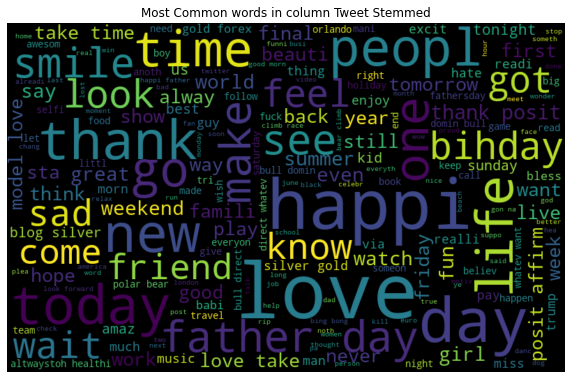

In [58]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

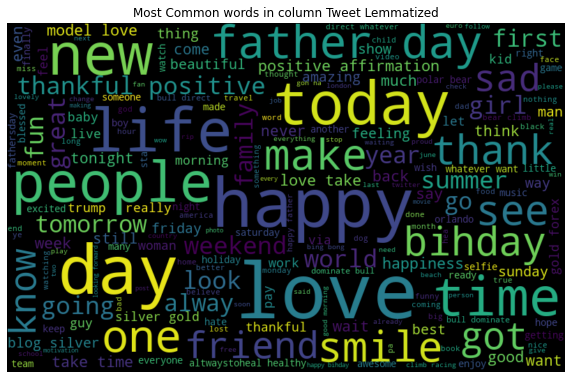

In [60]:
all_words = ' '.join([text for text in combine_df['tweet_lemma']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

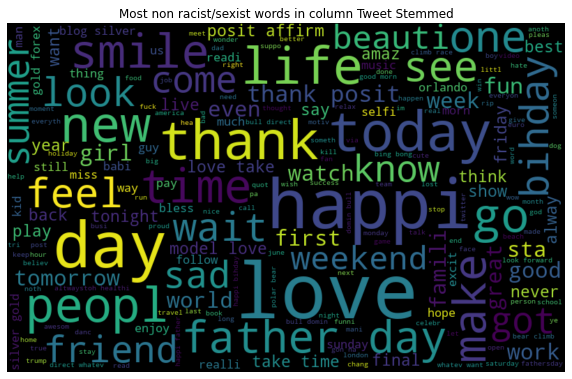

In [62]:
#Most common words in non racist/sexist tweets
non_racist = ' '.join([text for text in combine_df['tweet_stemmed'][combine_df['label'] == 0 ]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(non_racist)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Stemmed")
plt.show()

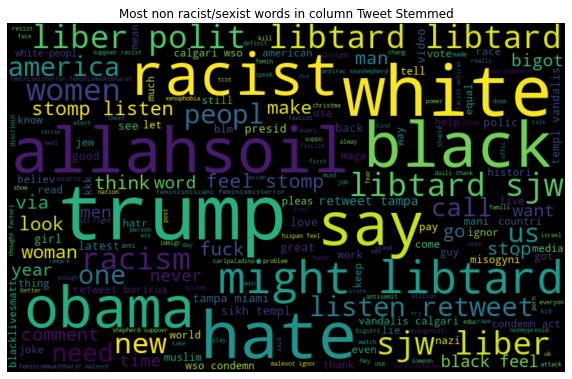

In [63]:
#Most common words in racist/sexist tweets
racist = ' '.join([text for text in combine_df['tweet_stemmed'][combine_df['label'] == 1 ]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(racist)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Stemmed")
plt.show()

### bag of words features


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(
                    max_df=0.9, 
                    min_df=2,
                    max_features=1000,
                    stop_words='english'
)
bow_vectorizer

CountVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [65]:
#creating a bow feature matrix for stemmed tweets
bow_stem = bow_vectorizer.fit_transform(combine_df['tweet_stemmed'])
bow_stem

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 203386 stored elements in Compressed Sparse Row format>

In [66]:
#creating a bow feature matrix for lemmatized tweets
bow_lemma = bow_vectorizer.fit_transform(combine_df['tweet_lemma'])
bow_lemma

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 187343 stored elements in Compressed Sparse Row format>

In [67]:
#tf-idf features for term and inverse document frequency 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
                            max_df=0.90, 
                            min_df=2, 
                            max_features=1000,
                            stop_words='english')
tfidf_vectorizer

TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [68]:
#td-idf feature matrix for stemmed tweets

tfidf_stem = tfidf_vectorizer.fit_transform(combine_df['tweet_stemmed'])
tfidf_stem

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 203386 stored elements in Compressed Sparse Row format>

In [69]:
#td-idf feature matrix for lemmatized tweets

tfidf_lemma = tfidf_vectorizer.fit_transform(combine_df['tweet_lemma'])
tfidf_lemma

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 187343 stored elements in Compressed Sparse Row format>

# Building the model (logistic regression)


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

## Building model using Bag-of-Words features

In [72]:
# for stemmed tweets

train_bow = bow_stem[:31962, :]
test_bow = bow_stem[31962:,:]

x_bow_train, x_bow_val, y_train, y_val = train_test_split(train_bow, train_df['label'], random_state=42, test_size=0.3)

In [75]:
model = LogisticRegression()
#training
model.fit(x_bow_train, y_train)

prediction = model.predict_proba(x_bow_val)

prediction_int = prediction[:,1] >= 0.3 #setting a threshold 
prediction_int = prediction_int.astype(np.int)

In [76]:
#f1 score
f1_stem = f1_score(y_val, prediction_int)
print(f1_stem) 

0.5550952775476387


### For lemmatized tweets

In [80]:
train_bow = bow_lemma[:31962,:]
test_bow = bow_lemma[31962:,:]

x_bow_train, x_bow_val, y_train, y_val = train_test_split(train_bow, train_df['label'], random_state=42, test_size=0.3)

model = LogisticRegression()
model.fit(x_bow_train, y_train) 

prediction = model.predict_proba(x_bow_val) 
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_lemma = f1_score(y_val, prediction_int)
print(f1_lemma)

0.5372112917023096


##  Building model using TF-IDF features

In [81]:
train_tfidf = tfidf_stem[:31962,:]
test_tfidf = tfidf_stem[31962:,:]

x_tfidf_train = train_tfidf[y_train.index]
x_tfidf_val = train_tfidf[y_val.index]

model.fit(x_tfidf_train, y_train)

prediction = model.predict_proba(x_tfidf_val)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_stem_tfidf = f1_score(y_val, prediction_int)
print(f1_stem_tfidf)

0.5444933920704845


In [87]:
train_tfidf = tfidf_lemma[:31962,:]
test_tfidf = tfidf_lemma[31962:,:]

x_tfidf_train = train_tfidf[y_train.index]
x_tfidf_val = train_tfidf[y_val.index]

model.fit(x_tfidf_train, y_train)

prediction = model.predict_proba(x_tfidf_val)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_lemma_tfidf = f1_score(y_val, prediction_int)
print(f1_lemma_tfidf)

0.5388046387154327


In [91]:
print("F1 - Score Chart")
print()
print("* F1-Score - Model using Bag-of-Words features")
print("   F1-Score for column tweets are stemmed: ",f1_stem)
print("   F1-Score for column tweets are lemmatized:",f1_lemma)
print()
print()
print("* F1-Score - Model using TF-IDF features")
print("   F1-Score for column tweets are stemmed: ",f1_stem_tfidf)
print("   F1-Score for column tweets are lemmatized: ",f1_lemma_tfidf)

F1 - Score Chart

* F1-Score - Model using Bag-of-Words features
   F1-Score for column tweets are stemmed:  0.5550952775476387
   F1-Score for column tweets are lemmatized: 0.5372112917023096


* F1-Score - Model using TF-IDF features
   F1-Score for column tweets are stemmed:  0.5388046387154327
   F1-Score for column tweets are lemmatized:  0.5388046387154327
